In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
! pwd

atomickitty.aws
compthink
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
/home/compthink/CECE-1330-PsuedoCourse/1-Lessons/Lesson14/PsuedoLesson


In [2]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

# Lesson 14, Towards Hypothesis Testing:

## Empirical Distributions

Last lesson we introduced empirical (based on observations) distributions and fit models to them - made the red line explain the blue dots.  Ltes refresh a little:

__Plotting Position:__ An empirical distribution, based on a random sample from some underlying distribution, is obtained by plotting an estimate of the exceedance (or cumulative) probability of the sample distribution against the sample value. <br>

The exceedance probability estimate for a particular sample value is a function of sample size and the rank of the particular sample. 
For exceedance probabilities, the sample values are ranked from largest to smallest. 

The general expression in common use for plotting position is $ P = \frac{m - b}{N + 1 -2b} $

where m is the ordered rank of a sample value, N is the sample size, and b is a constant between 0 and 1, depending on the plotting method.<br>

Lets look at some real data from https://www.depts.ttu.edu/techmrtweb/reports/complete_reports/0-6654-1_Final.pdf The database in the report is available at: http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson14/database_txdot0-6654.txt

A proper URL reading would look something like:

    import requests 
    remote_url="http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson14/database_txdot0-6654.txt"
    rget = requests.get(remote_url, allow_redirects=True)  
    open('database_txdot0-6654.txt','wb').write(rget.content) 
    
Of course neither of these will work with CoCalc, so you have to manually obtain the file.

Here we already have the file downloaded.

In [22]:
import pandas 
data = pandas.read_csv("database_txdot0-6654.txt",sep="|") 
data.head()

,STATION,LATDEG,LONDEG,CDA,MCS,PCS,MCS1085,MAP,OMEGAEM,Q,A,V,B,FDC
0,7227500,35.47028,101.87917,584.0,0.000993,-0.001302,0.01,48636.71,-0.071,373.0,117.0,3.19,104.0,0.8844
1,7227500,35.47028,101.87917,584.0,0.000993,-0.001302,0.01,48636.71,-0.071,961.0,300.0,3.20,285.0,0.9520
2,7227500,35.47028,101.87917,584.0,0.000993,-0.001302,0.01,48636.71,-0.071,1240.0,370.0,3.35,285.0,0.9619
3,7227500,35.47028,101.87917,584.0,0.000993,-0.001302,0.01,48636.71,-0.071,3240.0,613.0,5.29,259.0,0.9852
4,7227500,35.47028,101.87917,584.0,0.000993,-0.001302,0.01,48636.71,-0.071,2790.0,564.0,4.95,244.0,0.9830


The file contains various fields, here let's just name a few.

CDA is the contributing drainage area, V is the mean section velocity in the stream at a gaging station, B  is the topwidth, A is the cross section area of flow, Q is the beasured discharge.



In [23]:
data.describe()

,STATION,LATDEG,LONDEG,CDA,MCS,PCS,MCS1085,MAP,OMEGAEM,Q,A,V,B,FDC
count,8.716000e+04,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000,87160.000000
mean,8.031553e+06,30.964611,97.559126,3456.175954,0.001911,0.001024,0.001568,89782.819833,0.035240,1391.274509,560.867726,1.363315,102.836440,0.576762
std,2.645115e+05,1.822558,1.945012,6863.027946,0.002500,0.002222,0.001779,25066.180563,0.144071,6105.778306,1862.221619,1.040581,332.885599,0.297862
min,7.227500e+06,27.264170,93.519440,2.310000,-0.000041,-0.020000,-0.000864,30279.510000,-0.428000,0.001000,0.003000,0.001000,0.040000,0.000100
25%,8.058900e+06,29.570030,95.919170,188.000000,0.000646,-0.000028,0.000509,71566.780000,-0.071000,8.030000,10.600000,0.680000,18.000000,0.326275
50%,8.104100e+06,30.517220,97.620560,584.000000,0.001307,0.000468,0.000967,86816.740000,0.048000,49.800000,44.700000,1.110000,40.000000,0.592200
75%,8.166000e+06,32.199170,98.897170,2342.000000,0.002232,0.001929,0.001912,107752.900000,0.146000,389.000000,280.000000,1.740000,100.000000,0.850800
max,8.447020e+06,36.238610,104.001110,41412.000000,0.030000,0.020000,0.010000,150543.320000,0.336000,268600.000000,74700.000000,13.850000,45983.000000,1.000000


Lets build two datasets, one with CDA > 300, and one CDA < 300 and examine the velocities under these two classifications.

In [24]:
dataBig = data[data['CDA'] >= 300][['STATION','CDA','V']]
dataLittle = data[data['CDA'] < 300][['STATION','CDA','V']]

Now lets pose a simple question. Are the velocities from large drainage areas, bigger than small areas?
We can try a describe approach.

In [25]:
dataBig.describe()

,STATION,CDA,V
count,5.628300e+04,56283.000000,56283.000000
mean,8.004816e+06,5280.254819,1.483542
std,3.003822e+05,7971.520408,1.087066
min,7.227500e+06,303.000000,0.003000
25%,8.044000e+06,585.000000,0.780000
50%,8.104500e+06,1321.000000,1.230000
75%,8.167800e+06,5228.000000,1.870000
max,8.447020e+06,41412.000000,13.850000


In [26]:
dataLittle.describe()

,STATION,CDA,V
count,3.087700e+04,30877.000000,30877.000000
mean,8.080290e+06,131.221109,1.144164
std,1.713293e+05,84.080353,0.910045
min,7.227920e+06,2.310000,0.001000
25%,8.066200e+06,63.300000,0.550000
50%,8.095400e+06,120.000000,0.900000
75%,8.164503e+06,206.000000,1.450000
max,8.431700e+06,299.000000,10.440000


Hard to tell, the mean values are pretty close, standard deviation about the same, the IQR is close.
Lets try to plot two histograms side-by-side.  We can get some guidance from
https://stackoverflow.com/questions/45069828/how-to-plot-2-histograms-side-by-side?rq=1

And then Copy, Modify, Run (CMR) our new script.

<AxesSubplot:title={'center':'Velocity: Little Watersheds'}>

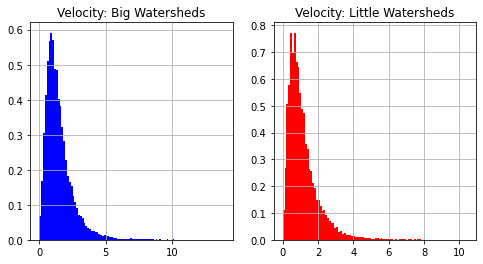

In [27]:
import matplotlib.pyplot 
# make a couple of dataframes
set1 = dataBig['V']
set2 = dataLittle['V']
# use subplots
fig, axes = matplotlib.pyplot.subplots(1, 2)
axes[0].set_title('Velocity: Big Watersheds') 
axes[1].set_title('Velocity: Little Watersheds')
# here we build the plots - notice the ax variable
set1.hist( bins=100, rwidth=1, color='blue', density=True, ax=axes[0],figsize = (8,4))
set2.hist( bins=100, rwidth=1, color='red', density=True, ax=axes[1],figsize = (8,4))

The plots look pretty darned similar, not identical, but too similar to conclude the size matters.

So lets try our empirical distribution approach

In [28]:
# First copy into numpy arrays
import numpy
big1s = numpy.array(dataBig['V'])
little1s = numpy.array(dataLittle['V'])

In [29]:
def weibull_pp(sample): # Weibull plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1)) #values from the gringorten formula
    return weibull_pp

In [30]:
#Apply the weibull pp function
big1s_wei = weibull_pp(big1s)
little1s_wei = weibull_pp(little1s)

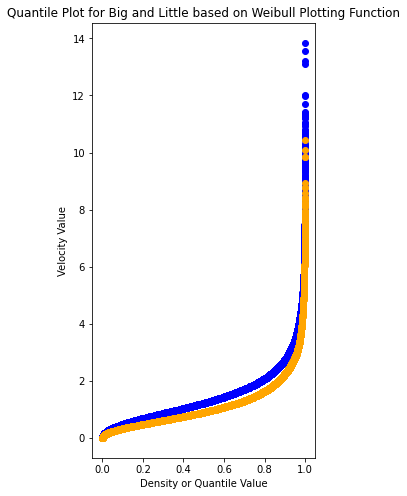

In [31]:
import matplotlib.pyplot
myfigure = matplotlib.pyplot.figure(figsize = (4,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(big1s_wei, big1s ,color ='blue')
matplotlib.pyplot.scatter(little1s_wei, little1s ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Velocity Value") 
matplotlib.pyplot.title("Quantile Plot for Big and Little based on Weibull Plotting Function") 
matplotlib.pyplot.show()

Now we have something, the gold line looks different in a probabilistic sense than the blue line except in the extreme part of the diagram, so the mean velocity is smaller on small watersheds, but such watersheds are quite capable of generating high velocities on rare occasion.

Lets log transform the results and look again - it does not change anything, but will highlight differences.

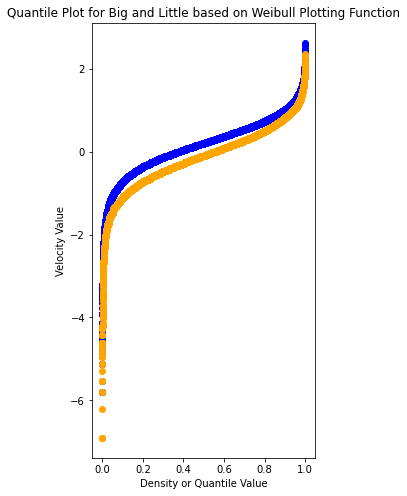

In [32]:
import math
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

big1s = numpy.array(dataBig['V'].apply(loggit).tolist())
little1s = numpy.array(dataLittle['V'].apply(loggit).tolist())

#Apply the weibull pp function
big1s_wei = weibull_pp(big1s)
little1s_wei = weibull_pp(little1s)

myfigure = matplotlib.pyplot.figure(figsize = (4,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(big1s_wei, big1s ,color ='blue')
matplotlib.pyplot.scatter(little1s_wei, little1s ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Velocity Value") 
matplotlib.pyplot.title("Quantile Plot for Big and Little based on Weibull Plotting Function") 
matplotlib.pyplot.show()

In log space we see even more of a difference. Next lesson we will learn about "hypothesis" tests where we can test if the differences are big enough to be meaningful, or are just a chance occurance.

Now let's play the same game with discharge, the product of velocity and area.

In [45]:
dataBig = data[data['CDA'] >= 60][['STATION','CDA','Q']]
dataLittle = data[data['CDA'] < 60][['STATION','CDA','Q']]
print(dataBig.describe())
print(dataLittle.describe())

            STATION           CDA              Q
count  7.995900e+04  79959.000000   79959.000000
mean   8.027296e+06   3764.698449    1504.954378
std    2.696393e+05   7084.554644    6359.728799
min    7.227500e+06     62.800000       0.001000
25%    8.055500e+06    244.000000      10.400000
50%    8.103800e+06    737.000000      59.200000
75%    8.166140e+06   2958.000000     468.000000
max    8.447020e+06  41412.000000  268600.000000
            STATION          CDA             Q
count  7.201000e+03  7201.000000   7201.000000
mean   8.078828e+06    30.380903    128.987519
std    1.926699e+05    15.705497    627.289584
min    7.311630e+06     2.310000      0.001000
25%    8.068780e+06    17.300000      1.100000
50%    8.115000e+06    28.700000      5.270000
75%    8.160800e+06    44.100000     28.800000
max    8.431700e+06    57.000000  16500.000000


<AxesSubplot:title={'center':'Discharge: Little Watersheds'}>

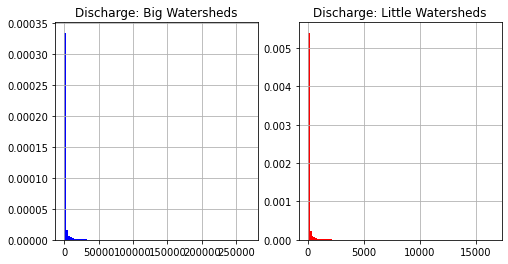

In [46]:
# make a couple of dataframes
set1 = dataBig['Q']
set2 = dataLittle['Q']
# use subplots
fig, axes = matplotlib.pyplot.subplots(1, 2)
axes[0].set_title('Discharge: Big Watersheds') 
axes[1].set_title('Discharge: Little Watersheds')
# here we build the plots - notice the ax variable
set1.hist( bins=100, rwidth=1, color='blue', density=True, ax=axes[0],figsize = (8,4))
set2.hist( bins=100, rwidth=1, color='red', density=True, ax=axes[1],figsize = (8,4))

In [47]:
big1s = numpy.array(dataBig['Q'])
little1s = numpy.array(dataLittle['Q'])

In [48]:
#Apply the weibull pp function
big1s_wei = weibull_pp(big1s)
little1s_wei = weibull_pp(little1s)

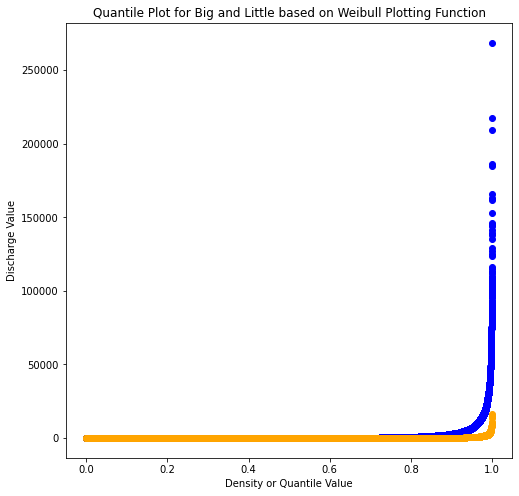

In [49]:
myfigure = matplotlib.pyplot.figure(figsize = (8,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(big1s_wei, big1s ,color ='blue')
matplotlib.pyplot.scatter(little1s_wei, little1s ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Discharge Value") 
matplotlib.pyplot.title("Quantile Plot for Big and Little based on Weibull Plotting Function") 
matplotlib.pyplot.show()

Here we see some difference - but would be hard to quantify meaningfully, lets repeat in log space. We will log transform the values and reanalyze.

In [38]:
import math
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

big1s = numpy.array(dataBig['Q'].apply(loggit).tolist())
little1s = numpy.array(dataLittle['Q'].apply(loggit).tolist())

In [39]:
#Apply the weibull pp function
big1s_wei = weibull_pp(big1s)
little1s_wei = weibull_pp(little1s)

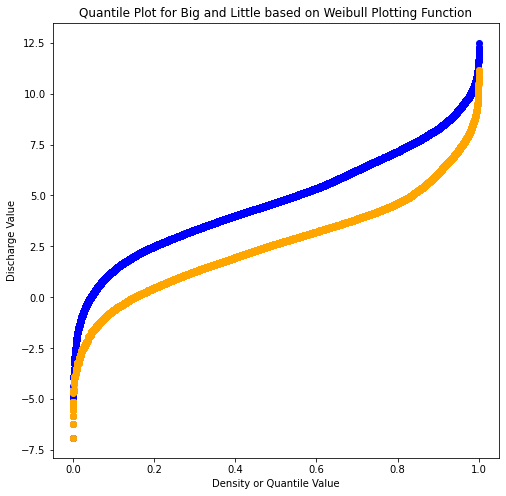

In [40]:
myfigure = matplotlib.pyplot.figure(figsize = (8,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(big1s_wei, big1s ,color ='blue')
matplotlib.pyplot.scatter(little1s_wei, little1s ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Discharge Value") 
matplotlib.pyplot.title("Quantile Plot for Big and Little based on Weibull Plotting Function") 
matplotlib.pyplot.show()

# Are they different enough?

In these cases, yes (at least for the mean value), we will learn methods next time to test for more subtle differences - in the general field called hypothesis tests.

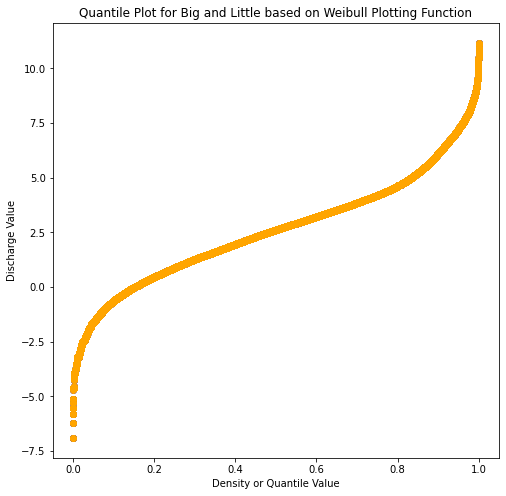

In [43]:
import math
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
big1s = numpy.array(dataLittle['Q'].apply(loggit).tolist())
little1s = numpy.array(dataLittle['Q'].apply(loggit).tolist())
#Apply the weibull pp function
big1s_wei = weibull_pp(big1s)
little1s_wei = weibull_pp(little1s)
myfigure = matplotlib.pyplot.figure(figsize = (8,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(big1s_wei, big1s ,color ='blue')
matplotlib.pyplot.scatter(little1s_wei, little1s ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Discharge Value") 
matplotlib.pyplot.title("Quantile Plot for Big and Little based on Weibull Plotting Function") 
matplotlib.pyplot.show()